In [3]:
import skimage
import skimage.data
import os
import numpy as np
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    #print(directories)
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        #print(file_names)
        for f in file_names:
            #images.append(skimage.data.imread(f))
            images.append(skimage.data.imread(f))
            labels.append(int(d))
            #print(labels)
    return images, labels

ROOT_PATH = "C:\\users\\radha\\desktop\\"
train_data_directory = os.path.join(ROOT_PATH, "Tflow\\Training")
test_data_directory = os.path.join(ROOT_PATH, "Tflow\\Testing")

images, labels = load_data(train_data_directory) 

images = np.array(images)
labels = np.array(labels)


In [5]:
print(images.ndim)
# Print the number of `images`'s elements
print(images.size)
# Count the number of labels
print(len(set(labels)))

print(labels)
print(labels.itemsize)

1
4575
62
[ 0  0  0 ... 61 61 61]
4


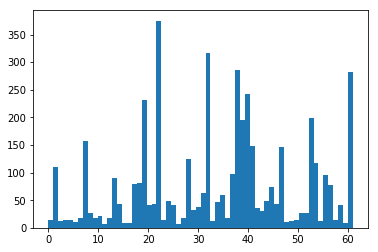

In [7]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

shape: (62, 61, 3), min: 3, max: 160


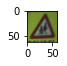

shape: (110, 96, 3), min: 3, max: 255


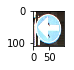

shape: (379, 153, 3), min: 0, max: 255


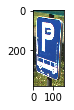

shape: (216, 134, 3), min: 0, max: 255


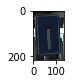

shape: (100, 68, 3), min: 17, max: 255


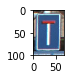

In [9]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4005,4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 5, i+1)
    #plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=1.5)
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))
    plt.show()

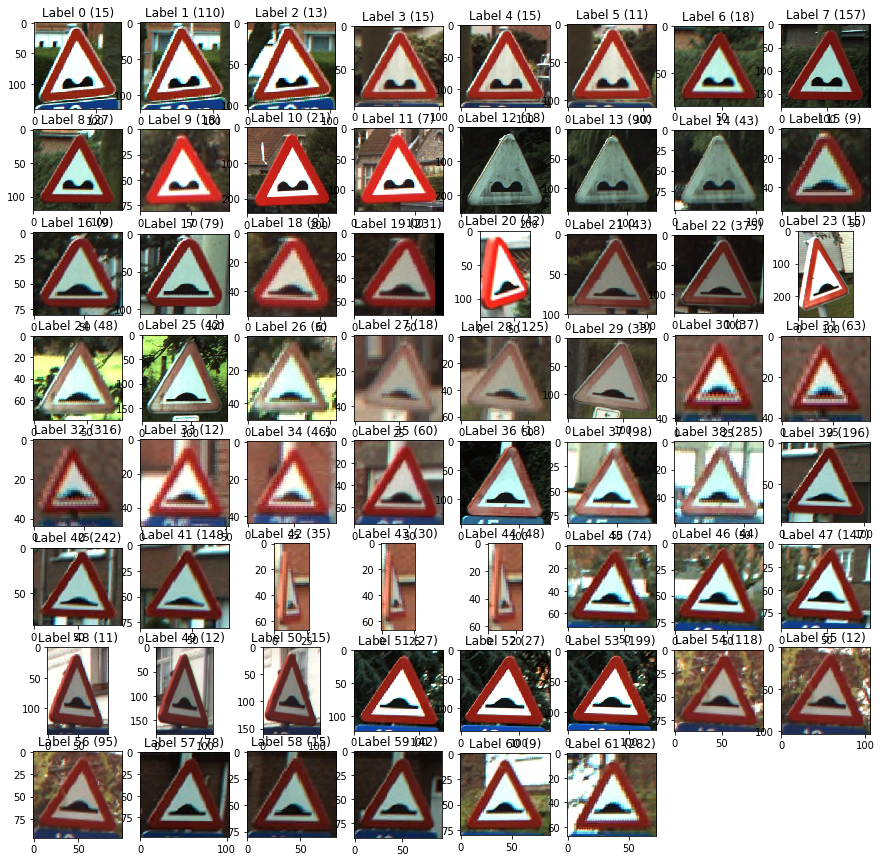

In [11]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)
# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    j = i-1;
    lb = list(labels).index(j)
    ct = list(labels).count(j)
    #print(lb)
    #print(ct)
   
    if(int(ct) >= 0):
        image = images[labels[lb]]
        #print(index(label))
        #print(image)
        # Define 64 subplots 
        plt.subplot(8, 8, i)
        # Don't include axes
        #plt.axis('off')
        # Add a title to each subplot 
        plt.title("Label {0} ({1})".format(label, ct))
        # Add 1 to the counter
        i += 1
        # And you plot this first image 
        plt.imshow(image)
    else:
        i += 1
        #print("i")

# Show the plot
plt.show()

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


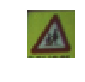

shape: (28, 28, 3), min: 0.06176470588235303, max: 0.6161764705882353


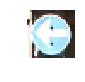

shape: (28, 28, 3), min: 0.07634053621448557, max: 1.0


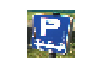

shape: (28, 28, 3), min: 0.08464760904361854, max: 1.0


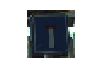

shape: (28, 28, 3), min: 0.03360344137655087, max: 1.0


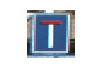

shape: (28, 28, 3), min: 0.08907563025210075, max: 1.0


In [13]:
# Import the `transform` module from `skimage`
from skimage import transform 
# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


[300, 2250, 3650, 4005, 4000]


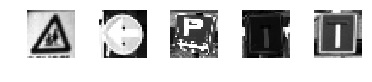

In [16]:

from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage import transform 
# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

images28 = np.array(images28)
# Convert `images28` to grayscale
images28 = rgb2gray(images28)
#print(images28)
print(traffic_signs)
i=1
for i in range(len(traffic_signs)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]],cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()    

In [18]:
# Import `tensorflow` 
import tensorflow as tf 

# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y,   logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("optimizer : ", train_op)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_1/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
optimizer :  name: "Adam_1"
op: "NoOp"
input: "^Adam_1/update_fully_connected_1/weights/ApplyAdam"
input: "^Adam_1/update_fully_connected_1/biases/ApplyAdam"
input: "^Adam_1/Assign"
input: "^Adam_1/Assign_1"

predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


In [20]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(1000):
        #print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 200 == 0:
            print("Loss: ", loss)
            print('Accuracy value '+str(accuracy_val)+str(_)+str(i))

Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Accuracy value 15.706667None0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Accuracy value 32.66273None200
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Accuracy value 32.38186None400
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Accuracy value 32.2918None600
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Accuracy value 32.19716None800


[32, 45, 39, 52, 17, 56, 59, 22, 14, 44]
[32 45 39 52 17 56 59 41 39 38]


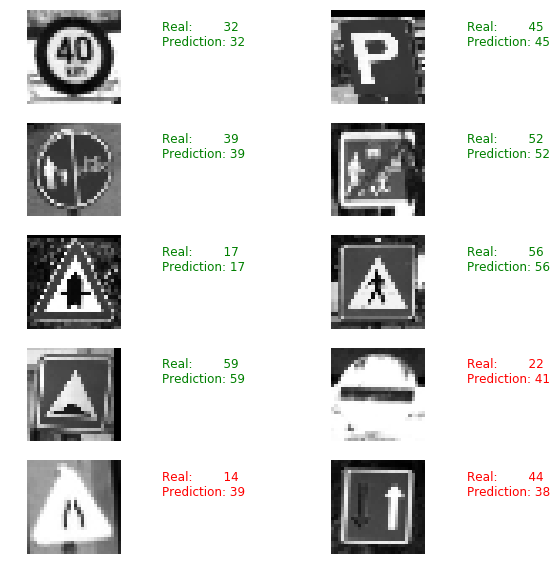

In [22]:
# Import `matplotlib`
import matplotlib.pyplot as plt
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    Real = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if Real == prediction else 'red'
    plt.text(40, 10, "Real:        {0}\nPrediction: {1}".format(Real, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.700


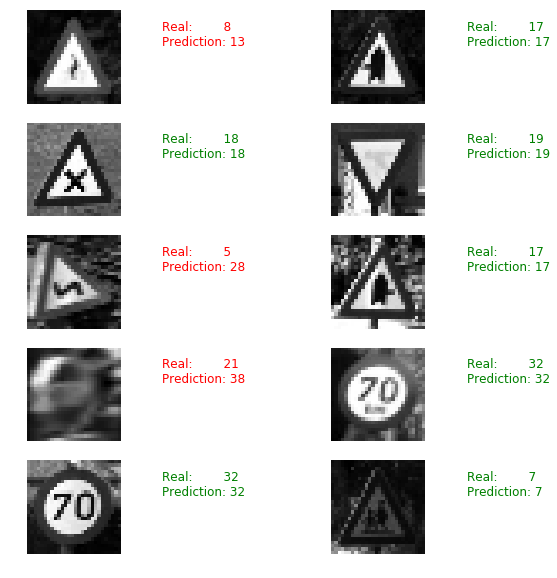

In [29]:
# Import `skimage` - TEST DATA DIR
from skimage import transform

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))
'''
# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))
'''

# Pick 10 random images
sample_indexes = random.sample(range(len(test_images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(sample_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(sample_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    Real = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if Real == prediction else 'red'
    plt.text(40, 10, "Real:        {0}\nPrediction: {1}".format(Real, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()